In [1]:
import random
import string
import collections
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
words = [w.strip() for w in open('words.txt').readlines()]
len(words)

62863

In [40]:
def o(letter):
    return ord(letter) - ord('a') + 1

def c(number):
    return chr((number - 1) % 26 + ord('a'))

In [79]:
def sanitise(phrase):
    return ''.join(l for l in phrase if l in string.ascii_lowercase)

In [95]:
def whash(word, h0=None, m1=3, m2=11):
    if h0 is None:
        h = list('xi')
    else:
        h = list(h0)
    for i in range(len(word)):
        h[0] = c(o(h[0]) + o(h[1]) * m1)
        h[1] = c(o(h[1]) + o(word[i]) * m2)
    return ''.join(h)

In [96]:
def whash2(word, h0=None, m1=3, m2=11):
    if h0 is None:
        h = list('xi')
    else:
        h = list(h0)
    for i in range(len(word)-1):
        h[0] = c(o(h[0]) + o(h[1]) + o(word[i]) * m1)
        h[1] = c(o(h[1]) + o(word[i]) + o(word[i+1]) * m2)
    return ''.join(h)

In [97]:
list('ab')

['a', 'b']

In [98]:
whash('hello', h0='ad', m1=3, m2=8)

'yd'

In [99]:
whash('hello')

'li'

In [100]:
whash2('hello')

'xj'

In [101]:
for w in random.sample(words, 5):
    print(w, whash(w), whash2(w))

prospectors as ln
mushroom my rq
insurrectionists sm zw
depoliticised wi nm
alphabetic jx ti


In [102]:
for w in random.sample(words, 5):
    print(w, whash2(w))

baggy zx
terminates kj
plotters en
concerto hk
daffiest ue


In [103]:
hashes = collections.Counter(whash(w) for w in words);

In [104]:
max(hashes.values()), min(hashes.values())

(116, 71)

In [105]:
hashes2 = collections.Counter(whash2(w) for w in words);

In [106]:
max(hashes2.values()), min(hashes2.values())

(206, 20)

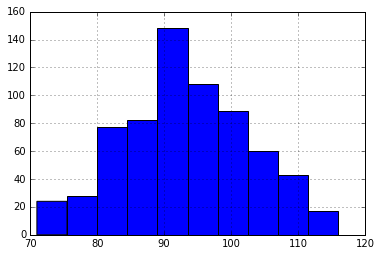

In [107]:
hss = pd.Series(hashes)
hss.hist();

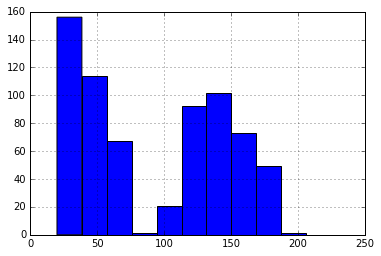

In [108]:
hss = pd.Series(hashes2)
hss.hist();

In [58]:
best_diff = 10000
bests = []

for l1 in string.ascii_lowercase:
    for l2 in string.ascii_lowercase:
        bh = l1 + l2
        print(bh, 'Bests:', bests, best_diff)
        for n1 in [3, 5, 7, 11, 17]:
            for n2 in [3, 5, 7, 11, 17]:
                hashes = collections.Counter(whash(w, h0=bh, m1=n1, m2=n2) for w in words)
                diff = max(hashes.values()) -  min(hashes.values())
                if diff < best_diff:
                    bests = [(bh, n1, n2)]
                    best_diff = diff
                elif diff == best_diff:
                    bests += [(bh, n1, n2)]

print(bests, best_diff)

aa Bests: [] 10000
ab Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7)] 45
ac Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7)] 45
ad Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7)] 45
ae Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7)] 45
af Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7)] 45
ag Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7)] 45
ah Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7)] 45
ai Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7)] 45
aj Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11)] 45
ak Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('

bj Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11)] 45
bk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11),

by Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5)] 45
bz Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17),

cj Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11)] 45
ck Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11),

ct Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3)] 45
cu Bests: [('aa', 3, 7), 

db Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

di Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

dp Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

dw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ec Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ei Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

eo Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

et Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ey Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

fd Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

fi Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

fn Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

fs Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

fw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ga Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ge Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

gi Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

gm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

gq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

gu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

gy Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

hc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

hg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

hk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

hn Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

hq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ht Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

hw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

hz Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ic Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

if Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ii Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

il Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

io Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ir Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

iu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ix Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ja Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

jd Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

jg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

jj Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

jm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

jp Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

js Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

jv Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

jy Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

kb Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ke Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

kh Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

kk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

kn Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

kq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

kt Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

kw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

kz Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

lc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

le Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

lg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

li Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

lk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

lm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

lo Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

lq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ls Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

lu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

lw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ly Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ma Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

mc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

me Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

mg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

mi Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

mk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

mm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

mo Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

mq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ms Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

mu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

mw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

my Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

na Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

nc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ne Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ng Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ni Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

nk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

nm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

no Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

nq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ns Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

nu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

nw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ny Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

oa Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

oc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

oe Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

og Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

oi Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ok Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

om Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

oo Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

oq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

os Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ou Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ow Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

oy Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

pa Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

pc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

pe Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

pg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

pi Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

pk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

pm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

po Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

pq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ps Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

pu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

pw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

py Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qa Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qe Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qi Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qo Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qs Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

qy Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ra Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

rc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

re Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

rg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ri Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

rk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

rm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ro Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

rq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

rs Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ru Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

rw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ry Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

sa Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

sc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

se Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

sg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

si Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

sk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

sm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

so Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

sq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ss Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

su Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

sw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

sy Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ta Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

tc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

te Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

tg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ti Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

tk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

tm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

to Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

tq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ts Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

tu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

tw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ty Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ua Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

uc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ue Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ug Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ui Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

uk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

um Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

uo Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

uq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

us Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

uu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

uw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

uy Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

va Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

vc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ve Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

vg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

vi Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

vk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

vm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

vo Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

vq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

vs Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

vu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

vw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

vy Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wa Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wd Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

we Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wf Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wh Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wi Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wj Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wl Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wn Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wo Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wp Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wr Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ws Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wt Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wv Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ww Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wx Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wy Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

wz Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xa Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xb Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xd Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xe Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xf Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xh Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xi Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xj Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xl Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xn Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xo Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xp Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xr Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xs Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xt Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xv Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xx Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xy Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

xz Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ya Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yb Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yd Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ye Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yf Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yh Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yi Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yj Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yl Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ym Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yn Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yo Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yp Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yr Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ys Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yt Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yv Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yx Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yy Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

yz Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

za Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zb Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zc Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zd Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

ze Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zf Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zg Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zh Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zi Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zj Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zk Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zl Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zm Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zn Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zo Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zp Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zq Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zr Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zs Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zt Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zu Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zv Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zw Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zx Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zy Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

zz Bests: [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17)

[('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17), ('cu', 7

In [66]:
bests = [('aa', 3, 7), ('aa', 5, 7), ('aa', 7, 7), ('aa', 11, 7), ('aa', 17, 7), ('ai', 3, 11), ('ai', 5, 11), 
         ('ai', 7, 11), ('ai', 11, 11), ('ai', 17, 11), ('as', 3, 3), ('as', 5, 3), ('as', 7, 3), ('as', 11, 3), 
         ('as', 17, 3), ('au', 3, 17), ('au', 5, 17), ('au', 7, 17), ('au', 11, 17), ('au', 17, 17), ('aw', 3, 5), 
         ('aw', 5, 5), ('aw', 7, 5), ('aw', 11, 5), ('aw', 17, 5), ('ba', 3, 7), ('ba', 5, 7), ('ba', 7, 7), 
         ('ba', 11, 7), ('ba', 17, 7), ('bi', 3, 11), ('bi', 5, 11), ('bi', 7, 11), ('bi', 11, 11), 
         ('bi', 17, 11), ('bs', 3, 3), ('bs', 5, 3), ('bs', 7, 3), ('bs', 11, 3), ('bs', 17, 3), ('bu', 3, 17), 
         ('bu', 5, 17), ('bu', 7, 17), ('bu', 11, 17), ('bu', 17, 17), ('bw', 3, 5), ('bw', 5, 5), ('bw', 7, 5), 
         ('bw', 11, 5), ('bw', 17, 5), ('ca', 3, 7), ('ca', 5, 7), ('ca', 7, 7), ('ca', 11, 7), ('ca', 17, 7), 
         ('ci', 3, 11), ('ci', 5, 11), ('ci', 7, 11), ('ci', 11, 11), ('ci', 17, 11), ('cs', 3, 3), ('cs', 5, 3), 
         ('cs', 7, 3), ('cs', 11, 3), ('cs', 17, 3), ('cu', 3, 17), ('cu', 5, 17), ('cu', 7, 17), ('cu', 11, 17), 
         ('cu', 17, 17), ('cw', 3, 5), ('cw', 5, 5), ('cw', 7, 5), ('cw', 11, 5), ('cw', 17, 5), ('da', 3, 7), 
         ('da', 5, 7), ('da', 7, 7), ('da', 11, 7), ('da', 17, 7), ('di', 3, 11), ('di', 5, 11), ('di', 7, 11), 
         ('di', 11, 11), ('di', 17, 11), ('ds', 3, 3), ('ds', 5, 3), ('ds', 7, 3), ('ds', 11, 3), ('ds', 17, 3), 
         ('du', 3, 17), ('du', 5, 17), ('du', 7, 17), ('du', 11, 17), ('du', 17, 17), ('dw', 3, 5), ('dw', 5, 5), 
         ('dw', 7, 5), ('dw', 11, 5), ('dw', 17, 5), ('ea', 3, 7), ('ea', 5, 7), ('ea', 7, 7), ('ea', 11, 7), 
         ('ea', 17, 7), ('ei', 3, 11), ('ei', 5, 11), ('ei', 7, 11), ('ei', 11, 11), ('ei', 17, 11), ('es', 3, 3), 
         ('es', 5, 3), ('es', 7, 3), ('es', 11, 3), ('es', 17, 3), ('eu', 3, 17), ('eu', 5, 17), ('eu', 7, 17), 
         ('eu', 11, 17), ('eu', 17, 17), ('ew', 3, 5), ('ew', 5, 5), ('ew', 7, 5), ('ew', 11, 5), ('ew', 17, 5), 
         ('fa', 3, 7), ('fa', 5, 7), ('fa', 7, 7), ('fa', 11, 7), ('fa', 17, 7), ('fi', 3, 11), ('fi', 5, 11), 
         ('fi', 7, 11), ('fi', 11, 11), ('fi', 17, 11), ('fs', 3, 3), ('fs', 5, 3), ('fs', 7, 3), ('fs', 11, 3), 
         ('fs', 17, 3), ('fu', 3, 17), ('fu', 5, 17), ('fu', 7, 17), ('fu', 11, 17), ('fu', 17, 17), ('fw', 3, 5), 
         ('fw', 5, 5), ('fw', 7, 5), ('fw', 11, 5), ('fw', 17, 5), ('ga', 3, 7), ('ga', 5, 7), ('ga', 7, 7), 
         ('ga', 11, 7), ('ga', 17, 7), ('gi', 3, 11), ('gi', 5, 11), ('gi', 7, 11), ('gi', 11, 11), 
         ('gi', 17, 11), ('gs', 3, 3), ('gs', 5, 3), ('gs', 7, 3), ('gs', 11, 3), ('gs', 17, 3), ('gu', 3, 17), 
         ('gu', 5, 17), ('gu', 7, 17), ('gu', 11, 17), ('gu', 17, 17), ('gw', 3, 5), ('gw', 5, 5), ('gw', 7, 5), 
         ('gw', 11, 5), ('gw', 17, 5), ('ha', 3, 7), ('ha', 5, 7), ('ha', 7, 7), ('ha', 11, 7), ('ha', 17, 7), 
         ('hi', 3, 11), ('hi', 5, 11), ('hi', 7, 11), ('hi', 11, 11), ('hi', 17, 11), ('hs', 3, 3), ('hs', 5, 3),
         ('hs', 7, 3), ('hs', 11, 3), ('hs', 17, 3), ('hu', 3, 17), ('hu', 5, 17), ('hu', 7, 17), ('hu', 11, 17), 
         ('hu', 17, 17), ('hw', 3, 5), ('hw', 5, 5), ('hw', 7, 5), ('hw', 11, 5), ('hw', 17, 5), ('ia', 3, 7), 
         ('ia', 5, 7), ('ia', 7, 7), ('ia', 11, 7), ('ia', 17, 7), ('ii', 3, 11), ('ii', 5, 11), ('ii', 7, 11), 
         ('ii', 11, 11), ('ii', 17, 11), ('is', 3, 3), ('is', 5, 3), ('is', 7, 3), ('is', 11, 3), ('is', 17, 3), 
         ('iu', 3, 17), ('iu', 5, 17), ('iu', 7, 17), ('iu', 11, 17), ('iu', 17, 17), ('iw', 3, 5), ('iw', 5, 5), 
         ('iw', 7, 5), ('iw', 11, 5), ('iw', 17, 5), ('ja', 3, 7), ('ja', 5, 7), ('ja', 7, 7), ('ja', 11, 7), 
         ('ja', 17, 7), ('ji', 3, 11), ('ji', 5, 11), ('ji', 7, 11), ('ji', 11, 11), ('ji', 17, 11), ('js', 3, 3), 
         ('js', 5, 3), ('js', 7, 3), ('js', 11, 3), ('js', 17, 3), ('ju', 3, 17), ('ju', 5, 17), ('ju', 7, 17), 
         ('ju', 11, 17), ('ju', 17, 17), ('jw', 3, 5), ('jw', 5, 5), ('jw', 7, 5), ('jw', 11, 5), ('jw', 17, 5), 
         ('ka', 3, 7), ('ka', 5, 7), ('ka', 7, 7), ('ka', 11, 7), ('ka', 17, 7), ('ki', 3, 11), ('ki', 5, 11), 
         ('ki', 7, 11), ('ki', 11, 11), ('ki', 17, 11), ('ks', 3, 3), ('ks', 5, 3), ('ks', 7, 3), ('ks', 11, 3), 
         ('ks', 17, 3), ('ku', 3, 17), ('ku', 5, 17), ('ku', 7, 17), ('ku', 11, 17), ('ku', 17, 17), ('kw', 3, 5), 
         ('kw', 5, 5), ('kw', 7, 5), ('kw', 11, 5), ('kw', 17, 5), ('la', 3, 7), ('la', 5, 7), ('la', 7, 7), 
         ('la', 11, 7), ('la', 17, 7), ('li', 3, 11), ('li', 5, 11), ('li', 7, 11), ('li', 11, 11), 
         ('li', 17, 11), ('ls', 3, 3), ('ls', 5, 3), ('ls', 7, 3), ('ls', 11, 3), ('ls', 17, 3), ('lu', 3, 17), 
         ('lu', 5, 17), ('lu', 7, 17), ('lu', 11, 17), ('lu', 17, 17), ('lw', 3, 5), ('lw', 5, 5), ('lw', 7, 5), 
         ('lw', 11, 5), ('lw', 17, 5), ('ma', 3, 7), ('ma', 5, 7), ('ma', 7, 7), ('ma', 11, 7), ('ma', 17, 7), 
         ('mi', 3, 11), ('mi', 5, 11), ('mi', 7, 11), ('mi', 11, 11), ('mi', 17, 11), ('ms', 3, 3), ('ms', 5, 3), 
         ('ms', 7, 3), ('ms', 11, 3), ('ms', 17, 3), ('mu', 3, 17), ('mu', 5, 17), ('mu', 7, 17), ('mu', 11, 17), 
         ('mu', 17, 17), ('mw', 3, 5), ('mw', 5, 5), ('mw', 7, 5), ('mw', 11, 5), ('mw', 17, 5), ('na', 3, 7), 
         ('na', 5, 7), ('na', 7, 7), ('na', 11, 7), ('na', 17, 7), ('ni', 3, 11), ('ni', 5, 11), ('ni', 7, 11), 
         ('ni', 11, 11), ('ni', 17, 11), ('ns', 3, 3), ('ns', 5, 3), ('ns', 7, 3), ('ns', 11, 3), ('ns', 17, 3), 
         ('nu', 3, 17), ('nu', 5, 17), ('nu', 7, 17), ('nu', 11, 17), ('nu', 17, 17), ('nw', 3, 5), ('nw', 5, 5), 
         ('nw', 7, 5), ('nw', 11, 5), ('nw', 17, 5), ('oa', 3, 7), ('oa', 5, 7), ('oa', 7, 7), ('oa', 11, 7), 
         ('oa', 17, 7), ('oi', 3, 11), ('oi', 5, 11), ('oi', 7, 11), ('oi', 11, 11), ('oi', 17, 11), ('os', 3, 3), 
         ('os', 5, 3), ('os', 7, 3), ('os', 11, 3), ('os', 17, 3), ('ou', 3, 17), ('ou', 5, 17), ('ou', 7, 17), 
         ('ou', 11, 17), ('ou', 17, 17), ('ow', 3, 5), ('ow', 5, 5), ('ow', 7, 5), ('ow', 11, 5), ('ow', 17, 5), 
         ('pa', 3, 7), ('pa', 5, 7), ('pa', 7, 7), ('pa', 11, 7), ('pa', 17, 7), ('pi', 3, 11), ('pi', 5, 11),
         ('pi', 7, 11), ('pi', 11, 11), ('pi', 17, 11), ('ps', 3, 3), ('ps', 5, 3), ('ps', 7, 3), ('ps', 11, 3), 
         ('ps', 17, 3), ('pu', 3, 17), ('pu', 5, 17), ('pu', 7, 17), ('pu', 11, 17), ('pu', 17, 17), ('pw', 3, 5), 
         ('pw', 5, 5), ('pw', 7, 5), ('pw', 11, 5), ('pw', 17, 5), ('qa', 3, 7), ('qa', 5, 7), ('qa', 7, 7), 
         ('qa', 11, 7), ('qa', 17, 7), ('qi', 3, 11), ('qi', 5, 11), ('qi', 7, 11), ('qi', 11, 11), ('qi', 17, 11), 
         ('qs', 3, 3), ('qs', 5, 3), ('qs', 7, 3), ('qs', 11, 3), ('qs', 17, 3), ('qu', 3, 17), ('qu', 5, 17), 
         ('qu', 7, 17), ('qu', 11, 17), ('qu', 17, 17), ('qw', 3, 5), ('qw', 5, 5), ('qw', 7, 5), ('qw', 11, 5), 
         ('qw', 17, 5), ('ra', 3, 7), ('ra', 5, 7), ('ra', 7, 7), ('ra', 11, 7), ('ra', 17, 7), ('ri', 3, 11), 
         ('ri', 5, 11), ('ri', 7, 11), ('ri', 11, 11), ('ri', 17, 11), ('rs', 3, 3), ('rs', 5, 3), ('rs', 7, 3), 
         ('rs', 11, 3), ('rs', 17, 3), ('ru', 3, 17), ('ru', 5, 17), ('ru', 7, 17), ('ru', 11, 17), ('ru', 17, 17), 
         ('rw', 3, 5), ('rw', 5, 5), ('rw', 7, 5), ('rw', 11, 5), ('rw', 17, 5), ('sa', 3, 7), ('sa', 5, 7), 
         ('sa', 7, 7), ('sa', 11, 7), ('sa', 17, 7), ('si', 3, 11), ('si', 5, 11), ('si', 7, 11), ('si', 11, 11), 
         ('si', 17, 11), ('ss', 3, 3), ('ss', 5, 3), ('ss', 7, 3), ('ss', 11, 3), ('ss', 17, 3), ('su', 3, 17), 
         ('su', 5, 17), ('su', 7, 17), ('su', 11, 17), ('su', 17, 17), ('sw', 3, 5), ('sw', 5, 5), ('sw', 7, 5), 
         ('sw', 11, 5), ('sw', 17, 5), ('ta', 3, 7), ('ta', 5, 7), ('ta', 7, 7), ('ta', 11, 7), ('ta', 17, 7), 
         ('ti', 3, 11), ('ti', 5, 11), ('ti', 7, 11), ('ti', 11, 11), ('ti', 17, 11), ('ts', 3, 3), ('ts', 5, 3), 
         ('ts', 7, 3), ('ts', 11, 3), ('ts', 17, 3), ('tu', 3, 17), ('tu', 5, 17), ('tu', 7, 17), ('tu', 11, 17), 
         ('tu', 17, 17), ('tw', 3, 5), ('tw', 5, 5), ('tw', 7, 5), ('tw', 11, 5), ('tw', 17, 5), ('ua', 3, 7), 
         ('ua', 5, 7), ('ua', 7, 7), ('ua', 11, 7), ('ua', 17, 7), ('ui', 3, 11), ('ui', 5, 11), ('ui', 7, 11), 
         ('ui', 11, 11), ('ui', 17, 11), ('us', 3, 3), ('us', 5, 3), ('us', 7, 3), ('us', 11, 3), ('us', 17, 3), 
         ('uu', 3, 17), ('uu', 5, 17), ('uu', 7, 17), ('uu', 11, 17), ('uu', 17, 17), ('uw', 3, 5), ('uw', 5, 5), 
         ('uw', 7, 5), ('uw', 11, 5), ('uw', 17, 5), ('va', 3, 7), ('va', 5, 7), ('va', 7, 7), ('va', 11, 7), 
         ('va', 17, 7), ('vi', 3, 11), ('vi', 5, 11), ('vi', 7, 11), ('vi', 11, 11), ('vi', 17, 11), ('vs', 3, 3), 
         ('vs', 5, 3), ('vs', 7, 3), ('vs', 11, 3), ('vs', 17, 3), ('vu', 3, 17), ('vu', 5, 17), ('vu', 7, 17), 
         ('vu', 11, 17), ('vu', 17, 17), ('vw', 3, 5), ('vw', 5, 5), ('vw', 7, 5), ('vw', 11, 5), ('vw', 17, 5), 
         ('wa', 3, 7), ('wa', 5, 7), ('wa', 7, 7), ('wa', 11, 7), ('wa', 17, 7), ('wi', 3, 11), ('wi', 5, 11), 
         ('wi', 7, 11), ('wi', 11, 11), ('wi', 17, 11), ('ws', 3, 3), ('ws', 5, 3), ('ws', 7, 3), ('ws', 11, 3), 
         ('ws', 17, 3), ('wu', 3, 17), ('wu', 5, 17), ('wu', 7, 17), ('wu', 11, 17), ('wu', 17, 17), ('ww', 3, 5), 
         ('ww', 5, 5), ('ww', 7, 5), ('ww', 11, 5), ('ww', 17, 5), ('xa', 3, 7), ('xa', 5, 7), ('xa', 7, 7), 
         ('xa', 11, 7), ('xa', 17, 7), ('xi', 3, 11), ('xi', 5, 11), ('xi', 7, 11), ('xi', 11, 11), ('xi', 17, 11), 
         ('xs', 3, 3), ('xs', 5, 3), ('xs', 7, 3), ('xs', 11, 3), ('xs', 17, 3), ('xu', 3, 17), ('xu', 5, 17), 
         ('xu', 7, 17), ('xu', 11, 17), ('xu', 17, 17), ('xw', 3, 5), ('xw', 5, 5), ('xw', 7, 5), ('xw', 11, 5), 
         ('xw', 17, 5), ('ya', 3, 7), ('ya', 5, 7), ('ya', 7, 7), ('ya', 11, 7), ('ya', 17, 7), ('yi', 3, 11), 
         ('yi', 5, 11), ('yi', 7, 11), ('yi', 11, 11), ('yi', 17, 11), ('ys', 3, 3), ('ys', 5, 3), ('ys', 7, 3), 
         ('ys', 11, 3), ('ys', 17, 3), ('yu', 3, 17), ('yu', 5, 17), ('yu', 7, 17), ('yu', 11, 17), ('yu', 17, 17), 
         ('yw', 3, 5), ('yw', 5, 5), ('yw', 7, 5), ('yw', 11, 5), ('yw', 17, 5), ('za', 3, 7), ('za', 5, 7), 
         ('za', 7, 7), ('za', 11, 7), ('za', 17, 7), ('zi', 3, 11), ('zi', 5, 11), ('zi', 7, 11), ('zi', 11, 11), 
         ('zi', 17, 11), ('zs', 3, 3), ('zs', 5, 3), ('zs', 7, 3), ('zs', 11, 3), ('zs', 17, 3), ('zu', 3, 17), 
         ('zu', 5, 17), ('zu', 7, 17), ('zu', 11, 17), ('zu', 17, 17), ('zw', 3, 5), ('zw', 5, 5), ('zw', 7, 5), 
         ('zw', 11, 5), ('zw', 17, 5)]
random.choice(bests)

('gs', 5, 3)

In [77]:
# best_diff = 10000
# bests = []

# for l1 in string.ascii_lowercase:
#     for l2 in string.ascii_lowercase:
#         bh = l1 + l2
#         print(bh, 'Bests:', bests, best_diff)
#         for n1 in [3, 5, 7, 11, 17]:
#             for n2 in [3, 5, 7, 11, 17]:
#                 hashes = collections.Counter(whash2(w, h0=bh, m1=n1, m2=n2) for w in words)
#                 diff = max(hashes.values()) -  min(hashes.values())
#                 if diff < best_diff:
#                     bests = [(bh, n1, n2)]
#                     best_diff = diff
#                 elif diff == best_diff:
#                     bests += [(bh, n1, n2)]

# print(bests, best_diff)

In [ ]:
# best_diff = 10000
# best_bh = ''
# best_n1 = 0
# best_n2 = 0

# for l1 in string.ascii_lowercase:
#     for l2 in string.ascii_lowercase:
#         bh = l1 + l2
#         print(bh, 'Best:', best_bh, best_n1, best_n2, best_diff)
#         for n1 in [2, 3, 5, 7, 11, 13]:
#             for n2 in [2, 3, 5, 7, 11, 13]:
#                 hashes = collections.Counter(whash2(w, h0=bh, m1=n1, m2=n2) for w in words)
#                 diff = max(hashes.values()) -  min(hashes.values())
#                 if diff <= best_diff:
#                     best_bh = bh
#                     best_n1 = n1
#                     best_n2 = n2
#                     best_diff = diff

# print(best_bh, best_n1, best_n2, best_diff)

In [109]:
ws = ['bats', 'bans', 'band', 'sand', 'said', 'skid', 'skit', 'smit', 'emit', 'exit']
[(w, whash(w)) for w in ws]

[('bats', 'pc'),
 ('bans', 'zo'),
 ('band', 'zf'),
 ('sand', 'sk'),
 ('said', 'jh'),
 ('skid', 'tn'),
 ('skit', 'th'),
 ('smit', 'vd'),
 ('emit', 'nf'),
 ('exit', 'lw')]

In [110]:
ws = ['bats', 'bans', 'band', 'sand', 'said', 'skid', 'skit', 'smit', 'emit', 'exit']
[(w, whash2(w)) for w in ws]

[('bats', 'cd'),
 ('bans', 'wj'),
 ('band', 'wa'),
 ('sand', 'dr'),
 ('said', 'lj'),
 ('skid', 'lz'),
 ('skit', 'lt'),
 ('smit', 'lr'),
 ('emit', 'td'),
 ('exit', 'tf')]

In [111]:
hashes = collections.defaultdict(list)
for w in words:
    hashes[whash(w)] += [w]
hashes['aa']

['abstainers',
 'annexes',
 'anointed',
 'avatars',
 'axe',
 'blowout',
 'bobbed',
 'boggy',
 'brightest',
 'buoys',
 'cannibal',
 'caretaker',
 'centigramme',
 'centralisation',
 'combinations',
 'commands',
 'compactly',
 'corroborated',
 'coworker',
 'cubing',
 'cult',
 'disgusted',
 'drenching',
 'dustbins',
 'earphone',
 'elevens',
 'encourages',
 'expressible',
 'extensively',
 'flagellums',
 'foot',
 'footsies',
 'frosting',
 'hibernate',
 'insensible',
 'instantly',
 'introverts',
 'jumbles',
 'kneeled',
 'leper',
 'lilacs',
 'magnifier',
 'malady',
 'merchant',
 'moth',
 'nicks',
 'nitpick',
 'nontrivial',
 'normalisation',
 'outpatients',
 'owning',
 'pedlar',
 'peed',
 'peeks',
 'pensioners',
 'pimpernel',
 'pomegranates',
 'predictor',
 'pungently',
 'pylon',
 'ramrodded',
 'redouble',
 'republishes',
 'rotogravure',
 'ruses',
 'salaamed',
 'shutterbugs',
 'signified',
 'sinus',
 'sleeking',
 'smear',
 'snipes',
 'spunkiest',
 'stagecoach',
 'surmised',
 'systematic',
 'tes

In [ ]:
hashes['zz']

In [ ]:
len(hashes) == 26**2

In [112]:
passphrase = sanitise("the traveller in the grey riding-coat, who called himself mr. melville, was "
                      "contemplating the malice of which the gods are capable.")

In [113]:
whash(passphrase)

'mb'

In [115]:
target = whash(passphrase, h0='xi', m1=3, m2=11)

alternatives = [(l1 + l2, n1, n2)
                for l1 in string.ascii_lowercase
                for l2 in string.ascii_lowercase
                for n1 in [3, 5, 7, 11, 17]
                for n2 in [3, 5, 7, 11, 17]
                if whash(passphrase, h0=(l1+l2), m1=n1, m2=n2) == target]
alternatives

[('bk', 7, 3),
 ('bq', 3, 5),
 ('da', 11, 17),
 ('di', 7, 11),
 ('dw', 5, 7),
 ('fi', 17, 11),
 ('ji', 11, 11),
 ('la', 7, 17),
 ('lk', 3, 3),
 ('lq', 5, 5),
 ('ni', 5, 11),
 ('nw', 11, 7),
 ('pa', 5, 17),
 ('pk', 17, 3),
 ('pq', 11, 5),
 ('pw', 7, 7),
 ('ra', 17, 17),
 ('rk', 11, 3),
 ('rw', 3, 7),
 ('ta', 3, 17),
 ('tk', 5, 3),
 ('tq', 17, 5),
 ('vq', 7, 5),
 ('xi', 3, 11),
 ('xw', 17, 7)]

In [116]:
%%timeit
target = whash(passphrase, h0='xi', m1=3, m2=11)

alternatives = []
for l1 in string.ascii_lowercase:
    for l2 in string.ascii_lowercase:
        bh = l1 + l2
        for n1 in [3, 5, 7, 11, 17]:
            for n2 in [3, 5, 7, 11, 17]:
                if whash(passphrase, h0=bh, m1=n1, m2=n2) == target:
                    alternatives.append((bh, n1, n2))
alternatives

1 loop, best of 3: 2.65 s per loop


In [117]:
%%timeit
target = whash(passphrase, h0='xi', m1=3, m2=11)

alternatives = [(l1 + l2, n1, n2)
                for l1 in string.ascii_lowercase
                for l2 in string.ascii_lowercase
                for n1 in [3, 5, 7, 11, 17]
                for n2 in [3, 5, 7, 11, 17]
                if whash(passphrase, h0=(l1+l2), m1=n1, m2=n2) == target]
alternatives

1 loop, best of 3: 2.64 s per loop
